In [89]:
from xmitgcm import llcreader
import xmitgcm
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
model = llcreader.ECCOPortalLLC4320Model()
ds = model.get_dataset(varnames=['W'], k_levels=[0], type='latlon')
ds = xmitgcm.mds_store._swap_dimensions(ds, geometry='sphericalpolar')

In [24]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, time: 10312, Zl: 1, YC: 12960, XC: 17280, Zp1: 2, Z: 1, XG: 17280, YG: 12960, Zu: 1)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-11-15T15:00:00
  * Z        (Z) >f4 -0.5
  * Zp1      (Zp1) >f4 0.0 -1.0
  * XC       (XC) float32 -114.9 -114.9 -114.9 -114.9 ... -114.9 -114.9 -114.9
  * YC       (YC) float32 -88.18 -88.18 -88.18 -88.18 ... 67.5 67.5 67.5 67.5
  * XG       (XG) float32 -115.0 -115.0 -115.0 -115.0 ... -114.9 -114.9 -114.9
  * YG       (YG) float32 -88.18 -88.18 -88.18 -88.18 ... 67.5 67.5 67.5 67.5
  * Zl       (Zl) >f4 0.0
  * Zu       (Zu) >f4 -1.0
Data variables: (12/24)
    W        (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 1, 12960, 4320), meta=np.ndarray>
    CS       (YC, XC) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    SN       (YC, XC) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    Depth    (YC, XC) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    ...       ...
    rAs      (YG, XC) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    rAw      (YC, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    rAz      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    dxV      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    dyU      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>

In [25]:
ds.nbytes / 1e12

9.253564740568

In [43]:
ds.XC.max()

<xarray.DataArray 'XC' ()>
array(121.30435, dtype=float32)

In [44]:
ds.XC.min()

<xarray.DataArray 'XC' ()>
array(-171.30435, dtype=float32)

In [101]:
ds_agulhas = ds.sel(YC=slice(-42, -40))

In [58]:
slice(120, 150)

slice(120, 150, None)

In [78]:
ds.sel(YC=-170, method="nearest")

<xarray.Dataset>
Dimensions:  (face: 13, time: 10312, Zl: 1, XC: 17280, Zp1: 2, Z: 1, XG: 17280, YG: 12960, Zu: 1)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-11-15T15:00:00
  * Z        (Z) >f4 -0.5
  * Zp1      (Zp1) >f4 0.0 -1.0
  * XC       (XC) float32 -114.9 -114.9 -114.9 -114.9 ... -114.9 -114.9 -114.9
    YC       float32 -88.18
  * XG       (XG) float32 -115.0 -115.0 -115.0 -115.0 ... -114.9 -114.9 -114.9
  * YG       (YG) float32 -88.18 -88.18 -88.18 -88.18 ... 67.5 67.5 67.5 67.5
  * Zl       (Zl) >f4 0.0
  * Zu       (Zu) >f4 -1.0
Data variables: (12/24)
    W        (time, Zl, XC) float32 dask.array<chunksize=(1, 1, 4320), meta=np.ndarray>
    CS       (XC) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    SN       (XC) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    Depth    (XC) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    ...       ...
    rAs      (YG, XC) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    rAw      (XG) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    rAz      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    dxV      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    dyU      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>

ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

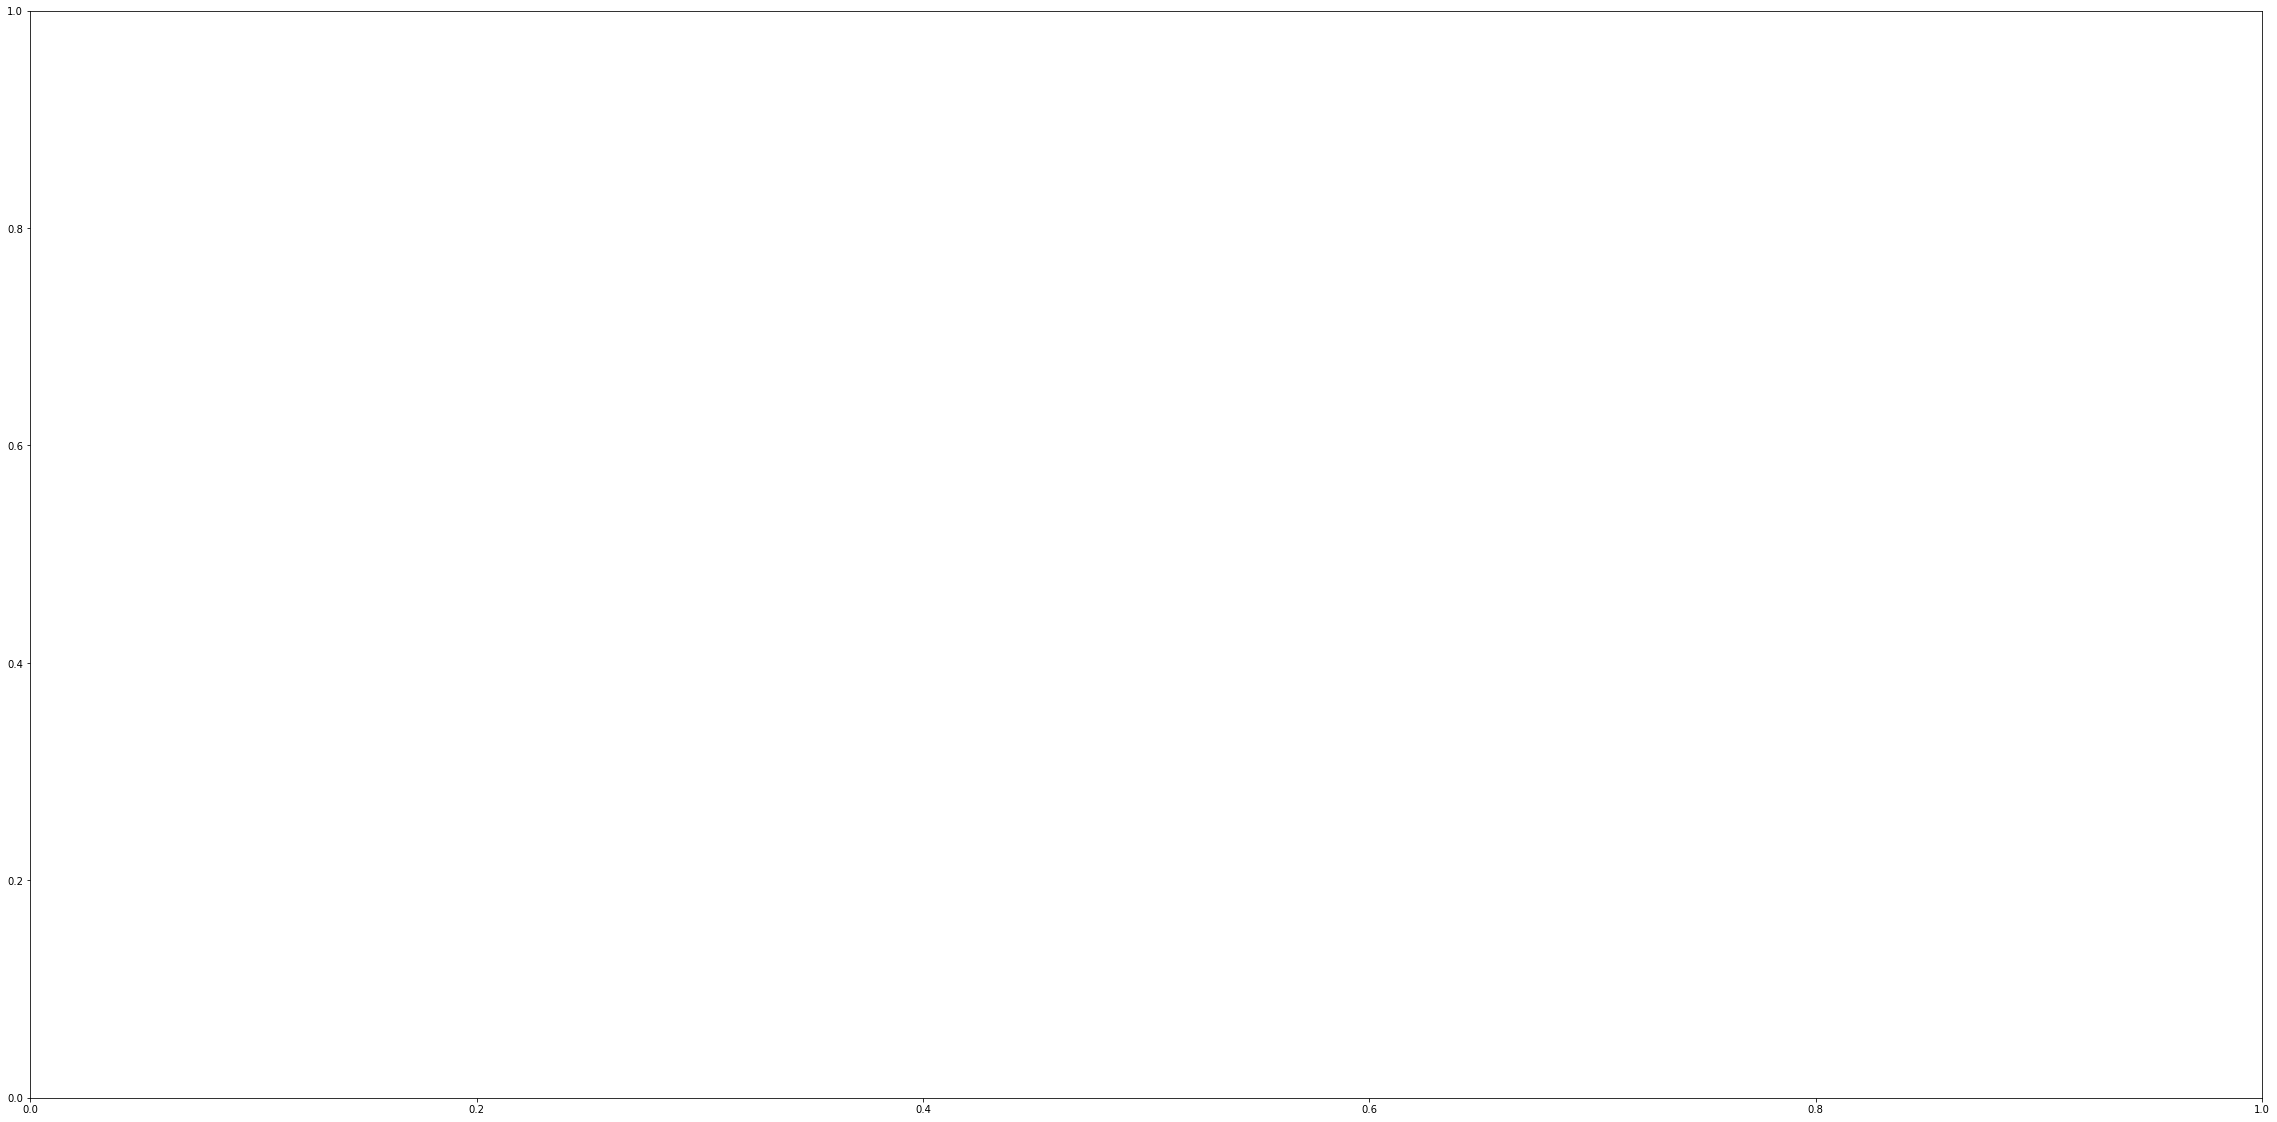

In [103]:
fig, ax = plt.subplots(figsize=(40, 20))
ds_agulhas.isel(time=0).W.plot(ax=ax)


In [102]:
ds_agulhas.isel(time=0).isel(W.nbytes / 2**12 

2328.75

In [104]:
ds_agulhas

<xarray.Dataset>
Dimensions:  (face: 13, time: 10312, Zl: 1, YC: 138, XC: 17280, Zp1: 2, Z: 1, XG: 17280, YG: 12960, Zu: 1)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-11-15T15:00:00
  * Z        (Z) >f4 -0.5
  * Zp1      (Zp1) >f4 0.0 -1.0
  * XC       (XC) float32 -114.9 -114.9 -114.9 -114.9 ... -114.9 -114.9 -114.9
  * YC       (YC) float32 -42.0 -41.98 -41.97 -41.96 ... -40.03 -40.02 -40.0
  * XG       (XG) float32 -115.0 -115.0 -115.0 -115.0 ... -114.9 -114.9 -114.9
  * YG       (YG) float32 -88.18 -88.18 -88.18 -88.18 ... 67.5 67.5 67.5 67.5
  * Zl       (Zl) >f4 0.0
  * Zu       (Zu) >f4 -1.0
Data variables: (12/24)
    W        (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 1, 138, 4320), meta=np.ndarray>
    CS       (YC, XC) float32 dask.array<chunksize=(138, 4320), meta=np.ndarray>
    SN       (YC, XC) float32 dask.array<chunksize=(138, 4320), meta=np.ndarray>
    Depth    (YC, XC) float32 dask.array<chunksize=(138, 4320), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    ...       ...
    rAs      (YG, XC) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    rAw      (YC, XG) float32 dask.array<chunksize=(138, 4320), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    rAz      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    dxV      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>
    dyU      (YG, XG) float32 dask.array<chunksize=(12960, 4320), meta=np.ndarray>